# Part I - (Ford go bike)
## by (Fahd Ashraf)

## Introduction
> The data set at hand includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, we will analyze it in order to find out the behavior of diffrent users

## Preliminary Wrangling


In [39]:
#NO WARNINGS 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#fixing the datatypes of the dates and extract the week days out of them
df.start_time =pd.to_datetime(df.start_time)
df.end_time =pd.to_datetime(df.end_time)
df['start_day']=df.start_time.dt.day_name()
df['end_day']=df.end_time.dt.day_name()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [20]:
#creating a function to reduce repetition 
#the function takes 4 arguments, datafram , specific column , plot titile , number of bins in the plot
def histogram(data,column,title,bins,range_min,range_max):
    data[column].hist(bins= bins,range=(range_min,range_max));
    plt.title(title);

### What is the structure of your dataset?

> we have 183412 instances with 18 features,we have 7 object datatypes indicating days of the week, genders and user types, and  8 numerical datatypes, and 2 datetime datatypes

### What is/are the main feature(s) of interest in your dataset?

> user type and duration in seconds is our main features of interest 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> member_gender and member_birth_year will help us with the investigation

## Univariate Exploration

> here we investigate distributions of individual variables. If
unusual points or outliers appear we will take a deeper look to clean things up
and prepare the data to look at relationships between variables.


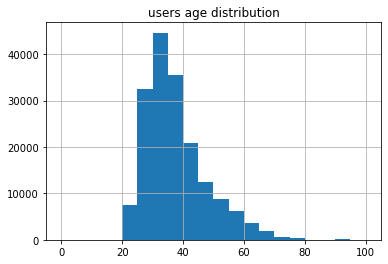

In [22]:
#first let us see the distribution of people riding the bikes 
#to do that we need to calculate the age of the users 
df['age']= 2022 - df.member_birth_year
histogram(df,'age','users age distribution',20,0,100)

we can see that most of the users in that 20 to 50 years zone 

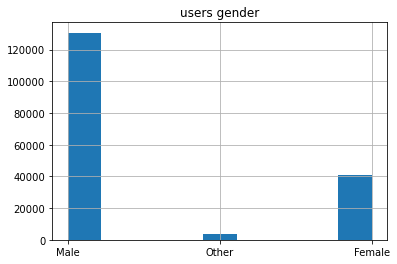

In [24]:
#what about the dominant gender 
#let us fill missing values with the mode
df.member_gender.fillna(df.member_gender.mode(),inplace=True)
histogram(df,'member_gender','users gender',9,0,2)

we can see clearly that nearly 75% of bikers are male 

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


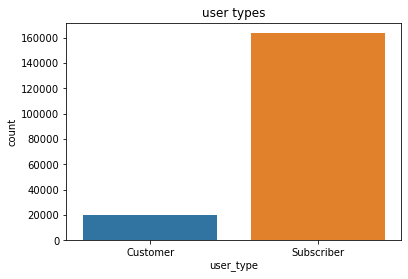

In [197]:
#next let's examine user types
sb.countplot(df.user_type);
plt.title('user types');


so we have 89% as subscribers and 11% as customers 

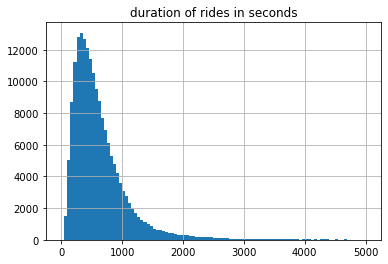

In [25]:
# lets look at the distribution f the ride duration
histogram(df,'duration_sec','duration of rides in seconds',100,0,5000)

most of the rides are in the 0 to 1000 seconds range

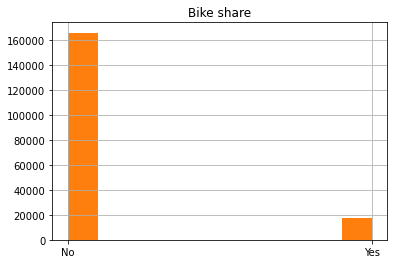

In [32]:
#also the bike share 
df.bike_share_for_all_trip.hist();
plt.title('Bike share');
histogram(df,'bike_share_for_all_trip','Bike share',10,0,1)

we see that the majority of people do not share there bikes in a trip

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


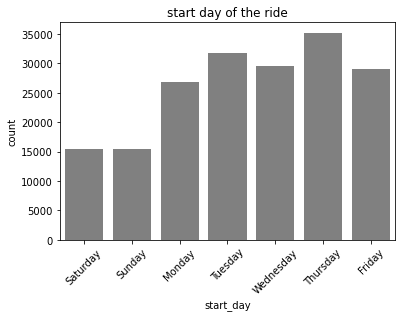

In [35]:
#what are the days we are getting more rides in
order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.countplot(df.start_day,color='grey',order = order);
plt.title('start day of the ride');
plt.xticks(rotation=45);

most rides start on a thursday 

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


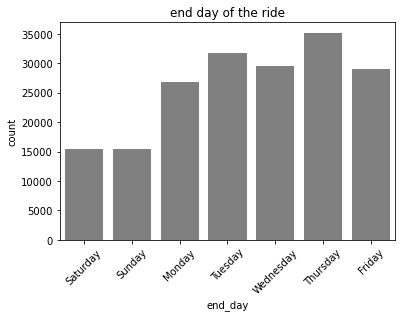

In [36]:
sb.countplot(df.end_day,color='grey',order=order);
plt.title('end day of the ride');
plt.xticks(rotation=45);

also most rides end on  a thursday, we see no clear diffrence that shows that there is a fraction of people who keep there bikes overnight 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> for user type we noticed that 90% of our users are subscribers 


> for trip duration we find that a lot of the users ride their bikes dor a period of just 15 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> we have extracted the age value for our users from their date of birth and we got a clear value of the distribution of ages of our users 

## Bivariate Exploration

> In this section we investigate relationships between pairs of variables in our
data.we examine the variables that has have been introduced in some
fashion in the previous section (univariate exploration).

<AxesSubplot:xlabel='age', ylabel='duration_sec'>

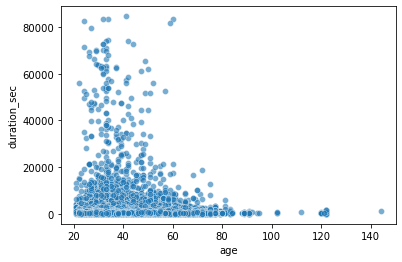

In [202]:
#does age has an effect on trip duration
sb.scatterplot(x=df.age,y=df.duration_sec,alpha=0.6)

we can see there is a negative relation between age and duration, but there is a lot of data points between 0 and 20000 second area, so we need to make sure before jumping into conclusions  

In [203]:
df.age.corr(df.duration_sec)

0.006026742656500267

And now we know that it shows like there is a relation in the graph but actually that is misleading

<AxesSubplot:>

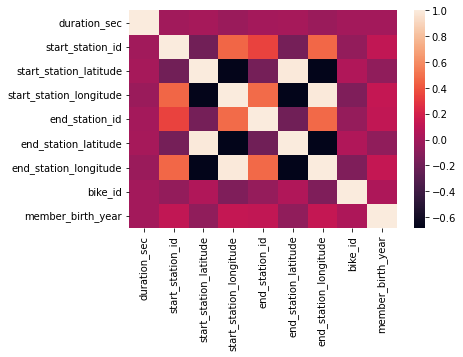

In [57]:
# is there any correlation between the feature that we can follow 
sb.heatmap(df.corr())

no usefull correlation found between the features

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


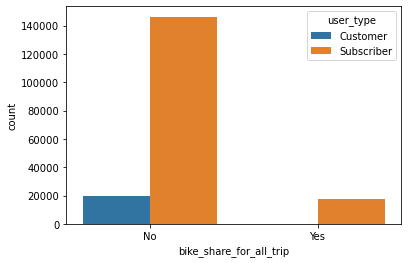

In [204]:
#so which type pf users share their bikes
sb.countplot(df.bike_share_for_all_trip,hue=df.user_type);

there is no customers who shares their rides

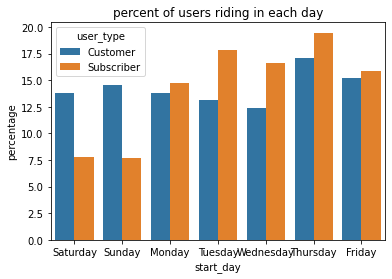

In [92]:
# we want to see what differ a subscriber from a customer in terms of riding duration and what days 
# most comman for each one 
# we will start by days
week_days =(
    df.groupby(['user_type'])['start_day']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
    .sort_values('start_day')
)
sb.barplot(x='start_day',y='percentage',hue='user_type',data=week_days,order=order);
plt.title('percent of users riding in each day');

we can see that customers exceed subscribers in riding their bikes in weekend days

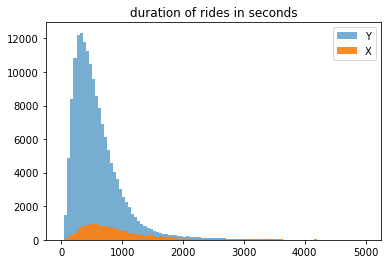

In [112]:
#now we need to see if there time on the bike is different
subscribers = df[df.user_type == 'Subscriber']
customers = df[df.user_type == 'Customer']
plt.hist(subscribers.duration_sec,bins=100,range=(0,5000),label='Y',alpha=0.6);
plt.hist(customers.duration_sec,bins=100,range=(0,5000),label='X',alpha=0.9);
plt.title('duration of rides in seconds');
plt.legend();

we can see that the ride duration for customers is relatively larger than users but it is not that obvious so we need to confirm that 

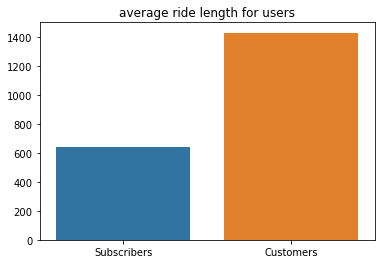

In [116]:
avg_ride_len =[subscribers.duration_sec.mean(),customers.duration_sec.mean()]
sb.barplot(x=['Subscribers','Customers'],y=avg_ride_len);
plt.title('average ride length for users');

our assumption was correct, the average ride length for a customer is nearly as twice as that of the user

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we observe a clear relation between the type of our users and the average length of the ride corresponding to the type, aslo we discovered that customers tend to not share their rides

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we discovered that customers tend to ride their bikes in the weekends rather than the rest of the week and they do that more that the subscribers 

## Multivariate Exploration

> our plots has three or more variables to investigate our data even
further.

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


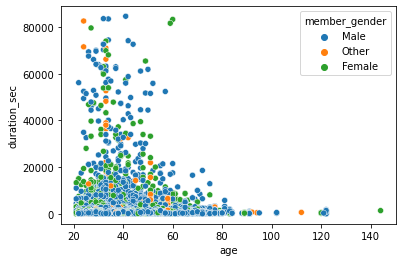

In [119]:
#does gender affect the trip duration with respect to age 
sb.scatterplot(df.age,df.duration_sec,hue=df.member_gender);

we can see that there is more of the green dots 'females'in the higher duration area, we need to examine this further to make sure

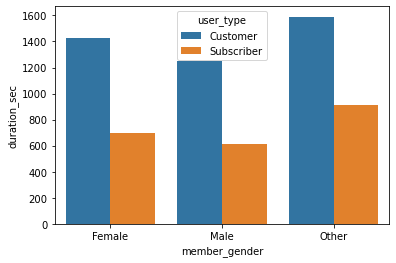

In [205]:
#so which one of the two genders has more duartion under his belt
avg2 = df.groupby(['member_gender','user_type'])['duration_sec'].mean().reset_index()
sb.barplot(x=avg2.member_gender,y=avg2.duration_sec,hue=avg2.user_type);


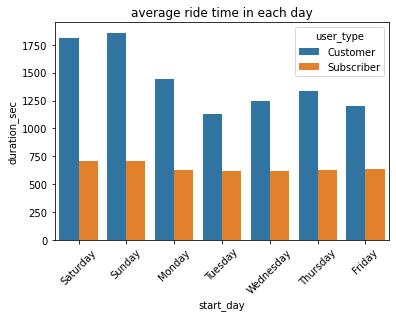

In [170]:
#now lets see how does the avrerage ride length differ each day
avg = df.groupby(['start_day','user_type'])['duration_sec'].mean().reset_index()
sb.barplot(x=avg.start_day,y=avg.duration_sec,hue=avg.user_type,order=order);
plt.title('average ride time in each day');
plt.xticks(rotation=45);

we can see clearly that customers average ride length fluctuate within the week but subscribers average time is nearly constant, also average time spent for customers peek in the weekends  

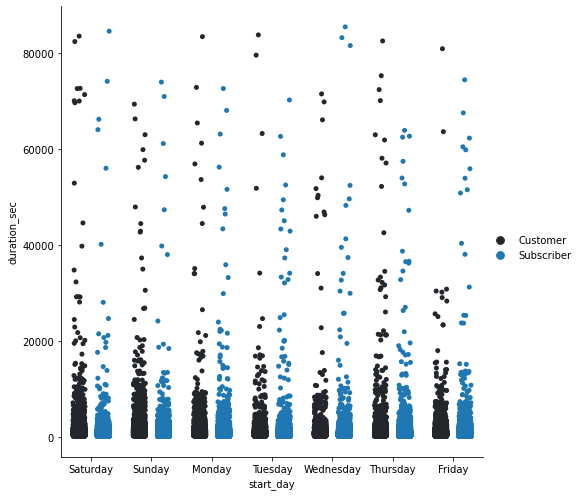

In [45]:
g=sb.FacetGrid(data=df,size=7)
g.map(sb.stripplot,'start_day','duration_sec','user_type',dodge=True,jitter=0.2,order=order)
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> after further examination of the week days and the duration feature we found that nearlly the average ride time for the subscriber is constant throught out the week but for the customer it is not the same case at all, the average time for the customers is at his peak in the weekends


## Conclusions
> I think our main takeaway from this dataset is that the behaviour and the time spent during the rides is diffrent for the subscribers and the customers, subscribers ride less throught out the week while our customers tend to ride alot throught out the week and specially in the weekends, we have driven new feature and a lot of plots to help us reach a data driven conclusion
